In [144]:
# Using a lag window for training
# Would using SGDRegressor for online training

In [172]:
import pandas as pd
import numpy as np

LAG = 5

df = pd.read_csv("ABB.csv")
print(df.columns)

features = ["Open", "High", "Low", "Volume", "Close"]
df = df[features]
# limit number of datapoints.
df = df[0:100]

print(df.columns)

y = df["Close"]
print(y)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')
0     16.828125
1     17.299999
2     17.790001
3     17.600000
4     17.500000
        ...    
95    11.130000
96    11.200000
97    11.530000
98    11.240000
99    11.150000
Name: Close, Length: 100, dtype: float64


In [173]:
# Start with linear regression --> need to introduce lag to adapt regression to time-series data.
def lag_features(data, lag=10):
    
    df = data.copy()
    for feature in features:
        for i in range(1, lag + 1):
            df[f'{feature}_lag{i}'] = df[feature].shift(i)

    for feature in features:
        df.pop(feature) # now remove non-lagged features, to avoid data leakage.
        
    return df
    # print("Lagged dataframe: ", df)

Index(['Open_lag1', 'Open_lag2', 'Open_lag3', 'Open_lag4', 'Open_lag5',
       'High_lag1', 'High_lag2', 'High_lag3', 'High_lag4', 'High_lag5',
       'Low_lag1', 'Low_lag2', 'Low_lag3', 'Low_lag4', 'Low_lag5',
       'Volume_lag1', 'Volume_lag2', 'Volume_lag3', 'Volume_lag4',
       'Volume_lag5', 'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4',
       'Close_lag5'],
      dtype='object')


In [180]:
# # Confirm time-series lagging worked.
# import matplotlib.pyplot as plt
# plt.plot(df['Open'][0:10])
# plt.show()
# plt.plot(X['Open_lag1'][0:10])
# plt.show()

In [187]:
# from sklearn.model_selection import train_test_split
# X = df.to_numpy()
# y = np.array(y, np.float32)
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Example of time-series data with a date index
# Define the split ratio
train_size = int(len(df) * 0.8)

# Split the data into training and test sets based on time
train, test = df[:train_size], df[train_size:]

X_train = lag_features(train, LAG)
y_train = train['Close']

X_test = lag_features(test, LAG)
y_test = test['Close']


In [188]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [183]:
y_pred = model.predict(X_test)

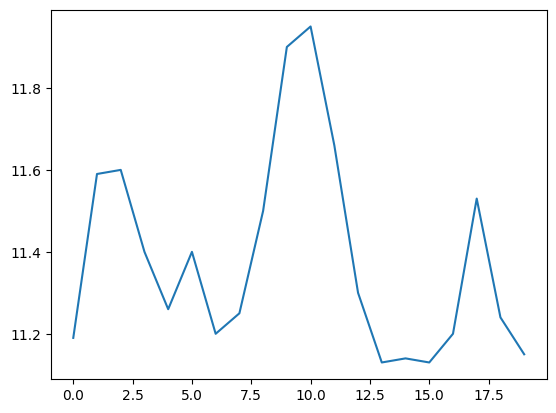

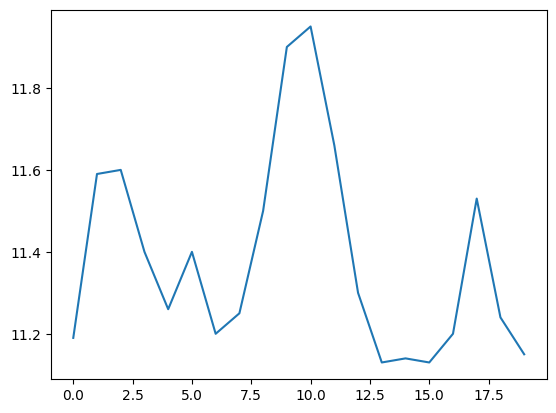

In [184]:
plt.plot(y_pred)
plt.show()
plt.plot(y_test)
plt.show()